In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal
# import koreanize_matplotlib
import seaborn as sns

gdp_data = pd.read_csv("../data/GDP_data/gdp_rate.csv")
gdp_data = gdp_data.loc[gdp_data['항목'] == '실질']
gdp_data = gdp_data.drop(columns = ['Unnamed: 0', '항목'])

pop_data = pd.read_csv("../data/GDP_data/pop_rate.csv")

city_list = list(gdp_data['시도별'].unique())
year_list = list(pop_data['year'].unique())
#2009~2022
year_list = year_list[1:-1]

gdp_data = gdp_data.set_index(['시도별', '경제활동별'])
pop_data = pop_data.set_index(['city', 'year'])

#명목GDP는 생산액을 당해년도 시장가격으로 평가=> 물가상승률이 반영
#실질GDP는 생산량과 시장가격의 곱=>생산량 변동만 평가

In [4]:
gdp_data.index

MultiIndex([(     '전국',   '총생산'),
            (     '전국', '1차 산업'),
            (     '전국', '2차 산업'),
            (     '전국', '3차 산업'),
            (  '서울특별시',   '총생산'),
            (  '서울특별시', '1차 산업'),
            (  '서울특별시', '2차 산업'),
            (  '서울특별시', '3차 산업'),
            (  '부산광역시',   '총생산'),
            (  '부산광역시', '1차 산업'),
            (  '부산광역시', '2차 산업'),
            (  '부산광역시', '3차 산업'),
            (  '대구광역시',   '총생산'),
            (  '대구광역시', '1차 산업'),
            (  '대구광역시', '2차 산업'),
            (  '대구광역시', '3차 산업'),
            (  '인천광역시',   '총생산'),
            (  '인천광역시', '1차 산업'),
            (  '인천광역시', '2차 산업'),
            (  '인천광역시', '3차 산업'),
            (  '광주광역시',   '총생산'),
            (  '광주광역시', '1차 산업'),
            (  '광주광역시', '2차 산업'),
            (  '광주광역시', '3차 산업'),
            (  '대전광역시',   '총생산'),
            (  '대전광역시', '1차 산업'),
            (  '대전광역시', '2차 산업'),
            (  '대전광역시', '3차 산업'),
            (  '울산광역시',   '총생산'),
            ( 

In [5]:
pop_data.head()

inc_rate
city year          
강원도  2008       NaN
     2009  0.002847
     2010  0.011203
     2011  0.004334
     2012  0.001420

In [6]:
gdp_total = []
gdp_total = pd.DataFrame(gdp_total)
gdp_1 = []
gdp_1 = pd.DataFrame(gdp_1)
gdp_2 = []
gdp_2 = pd.DataFrame(gdp_2)
gdp_3 = []
gdp_3 = pd.DataFrame(gdp_3)
pop_ = []
pop_new = pd.DataFrame(pop_)

for year in year_list:
    gdp_total[year] = 0.0
    gdp_1[year] = 0.0
    gdp_2[year] = 0.0
    gdp_3[year] = 0.0
    pop_new[year] = 0.0
    for city in city_list:
        gdp_total.loc[city] = np.nan
        gdp_1.loc[city] = np.nan
        gdp_2.loc[city] = np.nan
        gdp_3.loc[city] = np.nan
        pop_new.loc[city] = np.nan

for c in city_list:
    for y in year_list:
        gdp_total.loc[c, y] = gdp_data.loc[(c, '총생산'), str(y)]
        gdp_1.loc[c, y] = gdp_data.loc[(c, '1차 산업'), str(y)]
        gdp_2.loc[c, y] = gdp_data.loc[(c, '2차 산업'), str(y)]
        gdp_3.loc[c, y] = gdp_data.loc[(c, '3차 산업'), str(y)]
        if (c, y) in pop_data.index:
            pop_new.loc[c, y] = pop_data.loc[(c, y), 'inc_rate']

In [7]:
pop_new

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
전국,0.004699,0.014918,0.004328,0.004218,0.003792,0.003646,0.003924,0.003239,0.001593,0.000918,0.000459,-0.000402,-0.003670,-0.003869
서울특별시,0.000733,0.010212,-0.006096,-0.005304,-0.005068,-0.003984,-0.008022,-0.009136,-0.007370,-0.009313,-0.003739,-0.006233,-0.016446,-0.008527
부산광역시,-0.006045,0.007022,-0.004750,-0.003514,-0.003066,-0.002334,-0.001598,-0.004339,-0.007968,-0.008413,-0.008023,-0.006414,-0.012254,-0.009721
대구광역시,-0.001181,0.008794,-0.001754,-0.000649,-0.001619,-0.003327,-0.002180,-0.001315,-0.003754,-0.005439,-0.009643,-0.008074,-0.013618,-0.009106
인천광역시,0.006641,0.017604,0.015581,0.015246,0.012588,0.007926,0.007995,0.005897,0.001860,0.002069,0.000807,-0.004801,0.001885,0.006424
광주광역시,0.007688,0.014645,0.006069,0.003930,0.002514,0.002019,-0.002497,-0.002028,-0.003705,-0.003029,-0.001965,-0.004398,-0.005828,-0.007326
대전광역시,0.002218,0.013128,0.007940,0.005925,0.005397,-0.000654,-0.008509,-0.002900,-0.008019,-0.008182,-0.010112,-0.007450,-0.007945,-0.004255
울산광역시,0.002211,0.010254,0.008165,0.010358,0.008040,0.008558,0.006136,-0.001048,-0.006118,-0.008161,-0.006580,-0.010455,-0.012698,-0.009744
세종특별자치시,NaN,NaN,NaN,NaN,0.079882,0.278110,0.350738,0.152520,0.152447,0.121478,0.084199,0.044795,0.045145,0.031450
경기도,0.014908,0.028446,0.012794,0.013058,0.011687,0.010070,0.013334,0.015506,0.012355,0.015788,0.012427,0.014151,0.010310,0.001768


In [8]:
gdp_total.head(10)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
전국,0.009892,0.069995,0.036257,0.023394,0.031115,0.031367,0.027894,0.029442,0.031110,0.029010,0.022212,-0.006441,0.043225,0.026186
서울특별시,0.014963,0.035344,0.031529,0.013999,0.016498,0.015078,0.029211,0.028396,0.023393,0.035990,0.025982,0.008563,0.033618,0.015887
부산광역시,-0.034587,0.053149,0.025345,0.026425,0.016601,0.042315,0.030438,0.017086,0.015781,0.016946,0.025498,-0.035269,0.019388,0.025727
대구광역시,-0.027813,0.064826,0.034968,0.037458,0.035225,0.026372,0.029654,0.000036,0.017315,0.023592,0.014773,-0.019971,0.043766,0.017475
인천광역시,-0.013754,0.097352,0.017832,0.036759,0.026572,0.048234,0.018341,0.026450,0.042968,0.007405,0.017781,-0.034742,0.063815,0.059637
광주광역시,-0.021971,0.120572,0.018188,0.020586,0.038205,0.039872,0.019784,0.031220,0.012555,0.050336,0.036842,-0.002357,0.043675,0.016542
대전광역시,0.026250,0.070155,0.036049,0.015409,0.011386,0.019963,0.029959,0.034818,0.008215,0.009369,0.039564,0.012884,0.031349,0.044596
울산광역시,-0.015661,0.045139,0.079436,0.006160,0.005068,0.001197,0.006152,0.008555,-0.006923,-0.022264,0.009534,-0.067868,0.035552,-0.004589
세종특별자치시,NaN,NaN,NaN,NaN,NaN,0.254502,0.072544,0.050571,0.042165,0.027953,0.064031,0.050215,0.073954,0.032539
경기도,0.020933,0.098162,0.043336,0.044852,0.056769,0.045402,0.054724,0.046730,0.065891,0.060402,0.022955,0.016731,0.060286,0.036118


In [9]:
corr_list_year = gdp_total.corrwith(pop_new)
avg = sum(corr_list_year)/len(corr_list_year)
s1 = pd.Series([avg], index = ['평균'])
corr_list_year = corr_list_year.add(s1, fill_value=0)
corr_list_year = pd.DataFrame(corr_list_year)

corr_list_city = gdp_total.transpose().corrwith(pop_new.transpose())
corr_list_city = pd.DataFrame(corr_list_city)


In [10]:
corr_list_year.sort_values(by=[0], ascending=False)
# corr_list_year

,0
2014,0.938519
2019,0.700030
2021,0.607897
2020,0.545086
2012,0.511082
2015,0.469917
평균,0.452447
2011,0.436182
2009,0.428298
2016,0.407361


In [11]:
corr_list_city.sort_values(by=[0], ascending=False)

,0
경상북도,0.546517
경기도,0.539062
전국,0.528359
세종특별자치시,0.524178
인천광역시,0.492032
충청북도,0.479745
제주특별자치도,0.460760
울산광역시,0.444794
충청남도,0.441544
부산광역시,0.414890


<Axes: >

/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Gly

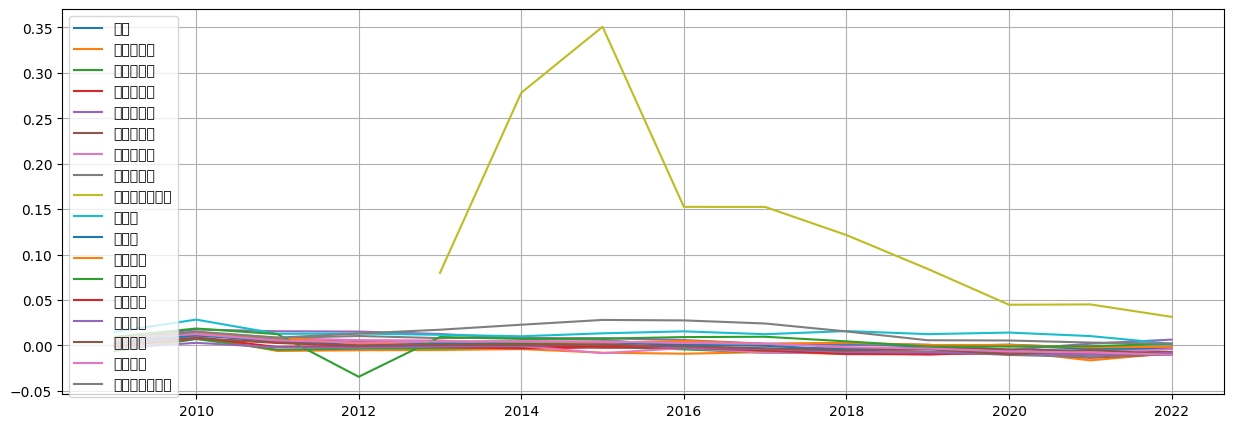

In [12]:
pop_new.transpose().plot(figsize= (15,5), grid= True)


<Axes: >

/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/kim/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Gly

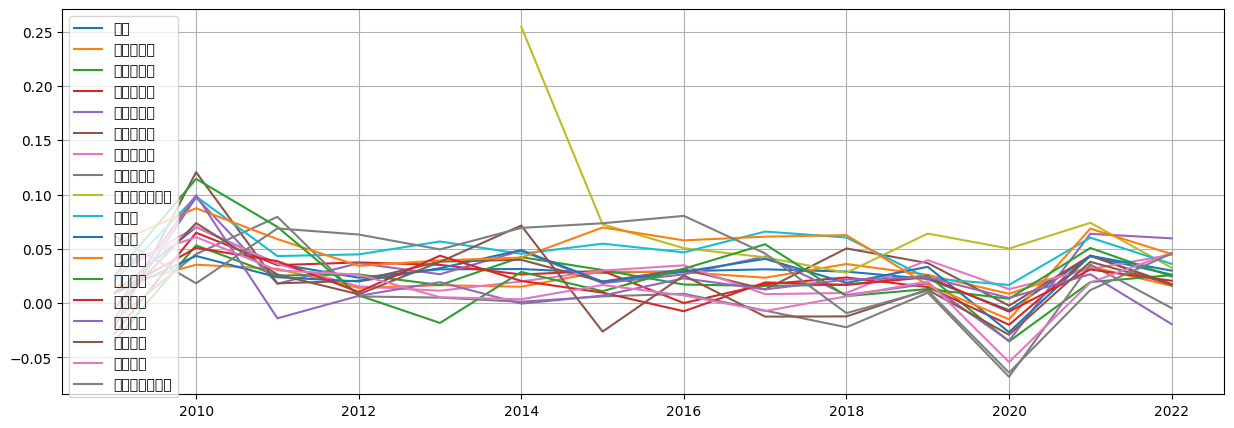

In [13]:
gdp_total.transpose().plot(figsize=(15,5), grid = True)

In [14]:
idx0 = pd.MultiIndex.from_product([city_list, year_list], names = ['city', 'year'])
col0 = ['total_gdp_growth', 'population_growth']
col1 = ['primary_industry_growth', 'population_growth']
col2 = ['secondary_industry_growth', 'population_growth']
col3 = ['tertiary_industry_growth', 'population_growth']
col_overall = ['population_growth', 'total_gdp_growth', 'primary_industry_growth',
               'secondary_industry_growth','tertiary_industry_growth']

df0 = pd.DataFrame(np.nan, idx0, col0)
df1 = pd.DataFrame(np.nan, idx0, col1)
df2 = pd.DataFrame(np.nan, idx0, col2)
df3 = pd.DataFrame(np.nan, idx0, col3)
df_overall = pd.DataFrame(np.nan, idx0, col_overall)

for c in city_list:
    for y in year_list:
        df0.loc[(c,y), 'total_gdp_growth'] = gdp_total.loc[c, y]
        df0.loc[(c,y), 'population_growth'] = pop_new.loc[c, y]
        df1.loc[(c,y), 'primary_industry_growth'] = gdp_total.loc[c, y]
        df1.loc[(c,y), 'population_growth'] = pop_new.loc[c, y]
        df2.loc[(c,y), 'secondary_industry_growth'] = gdp_total.loc[c, y]
        df2.loc[(c,y), 'population_growth'] = pop_new.loc[c, y]
        df3.loc[(c,y), 'tertiary_industry_growth'] = gdp_total.loc[c, y]
        df3.loc[(c,y), 'population_growth'] = pop_new.loc[c, y]

        df_overall.loc[(c,y), 'population_growth'] = pop_new.loc[c, y]
        df_overall.loc[(c,y), 'total_gdp_growth'] = gdp_total.loc[c, y]
        df_overall.loc[(c,y), 'primary_industry_growth'] = gdp_1.loc[c, y]
        df_overall.loc[(c,y), 'secondary_industry_growth'] = gdp_2.loc[c, y]
        df_overall.loc[(c,y), 'tertiary_industry_growth'] = gdp_3.loc[c, y]
df_overall

population_growth  total_gdp_growth  primary_industry_growth  \
city    year                                                                 
전국      2009           0.004699          0.009892                 0.039363   
        2010           0.014918          0.069995                -0.038081   
        2011           0.004328          0.036257                -0.004233   
        2012           0.004218          0.023394                -0.011548   
        2013           0.003792          0.031115                 0.043693   
...                         ...               ...                      ...   
제주특별자치도 2018           0.015383         -0.009212                -0.125456   
        2019           0.005693          0.011487                -0.013765   
        2020           0.005434         -0.064041                 0.031760   
        2021           0.003148          0.012002                 0.004914   
        2022           0.002069          0.045681                 0.021289   

              secondary_industry_growth  tertiary_industry_growth  
city    year                                                       
전국      2009                  -0.010279                  0.023165  
        2010                   0.163539                  0.045346  
        2011                   0.052253                  0.037918  
        2012                   0.014043                  0.032856  
        2013                   0.030621                  0.035252  
...                                 ...                       ...  
제주특별자치도 2018                  -0.035253                  0.052977  
        2019                  -0.044275                  0.039358  
        2020                  -0.046452                 -0.063624  
        2021                   0.036708                  0.034721  
        2022                  -0.030247                  0.045595  

[252 rows x 5 columns]

<Axes: xlabel='total_gdp_growth', ylabel='population_growth'>

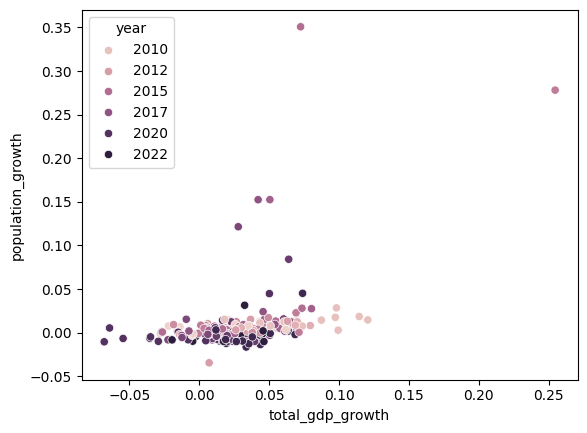

In [15]:
sns.scatterplot(x='total_gdp_growth', y='population_growth', data=df0, hue= 'year')

<Axes: xlabel='population_growth', ylabel='Count'>

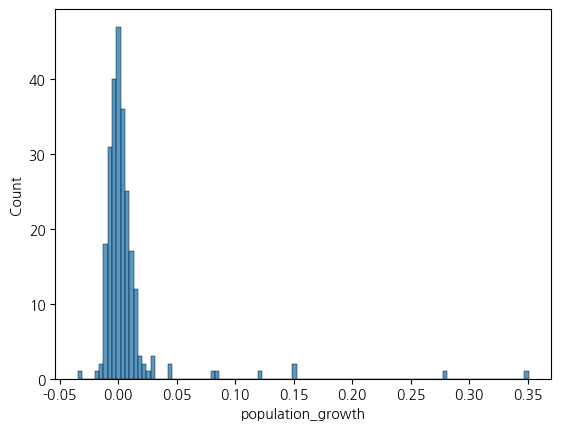

In [87]:
sns.histplot(df0.population_growth)

In [88]:
# gdp_total.to_csv("~/Downloads/totalGDP_rate.csv")
# gdp_1.to_csv("~/Downloads/ind1st_rate.csv")
# gdp_2.to_csv("~/Downloads/ind2nd_rate.csv")
# gdp_3.to_csv("~/Downloads/ind3rd_rate.csv")

# pop_new.to_csv("~/Downloads/population_rate.csv")

# df0.to_csv("~/Downloads/totalGDP_pop_coef.csv")
# df1.to_csv("~/Downloads/ind1st_pop_coef.csv")
# df2.to_csv("~/Downloads/ind2nd_pop_coef.csv")
# df3.to_csv("~/Downloads/ind3rd_pop_coef.csv")
# df_overall.to_csv("~/Downloads/overall_ind_table.csv")
